In [2]:
import numpy as np
from numpy import genfromtxt
my_data = []
my_data.append(genfromtxt('../data/rates_t150_y2008.csv', delimiter=','))
my_data.append(genfromtxt('../data/rates_t150_y2009.csv', delimiter=','))
my_data.append(genfromtxt('../data/rates_t150_y2010.csv', delimiter=','))
my_data.append(genfromtxt('../data/rates_t150_y2011.csv', delimiter=','))
my_data.append(genfromtxt('../data/rates_t150_y2012.csv', delimiter=','))
my_data.append(genfromtxt('../data/rates_t150_y2013.csv', delimiter=','))
my_data.append(genfromtxt('../data/rates_t150_y2014.csv', delimiter=','))
my_data.append(genfromtxt('../data/rates_t150_y2015.csv', delimiter=','))
my_data.append(genfromtxt('../data/rates_t150_y2016.csv', delimiter=','))
my_data.append(genfromtxt('../data/rates_t150_y2017.csv', delimiter=','))


In [8]:
print (len(my_data))
for data in my_data:
    print(data.shape)



10
(132, 4)
(32, 4)
(12, 4)
(27, 4)
(74, 4)
(52, 4)
(60, 4)
(79, 4)
(33, 4)
(120, 4)
(10,)


In [5]:
my_era = []
my_era.append(genfromtxt('../data/sp_t2m_d2md_s10_tp_lai_lv_swvl1_t150_2008.csv', delimiter=','))
my_era.append(genfromtxt('../data/sp_t2m_d2md_s10_tp_lai_lv_swvl1_t150_2009.csv', delimiter=','))
my_era.append(genfromtxt('../data/sp_t2m_d2md_s10_tp_lai_lv_swvl1_t150_2010.csv', delimiter=','))
my_era.append(genfromtxt('../data/sp_t2m_d2md_s10_tp_lai_lv_swvl1_t150_2011.csv', delimiter=','))
my_era.append(genfromtxt('../data/sp_t2m_d2md_s10_tp_lai_lv_swvl1_t150_2012.csv', delimiter=','))
my_era.append(genfromtxt('../data/sp_t2m_d2md_s10_tp_lai_lv_swvl1_t150_2013.csv', delimiter=','))
my_era.append(genfromtxt('../data/sp_t2m_d2md_s10_tp_lai_lv_swvl1_t150_2014.csv', delimiter=','))
my_era.append(genfromtxt('../data/sp_t2m_d2md_s10_tp_lai_lv_swvl1_t150_2015.csv', delimiter=','))
my_era.append(genfromtxt('../data/sp_t2m_d2md_s10_tp_lai_lv_swvl1_t150_2016.csv', delimiter=','))
my_era.append(genfromtxt('../data/sp_t2m_d2md_s10_tp_lai_lv_swvl1_t150_2017.csv', delimiter=','))


In [6]:
print(len(my_era))
for data in my_era:
    print(data.shape)

10
(132, 7)
(32, 7)
(12, 7)
(27, 7)
(74, 7)
(52, 7)
(60, 7)
(79, 7)
(33, 7)
(120, 7)


59
19
19


In [11]:
y = np.zeros((366,101,101))
#for i in range(len(my_data)):
#    time = int(my_data[i][0])
#    lat = int(my_data[i][1])
#    lon = int(my_data[i][2])
#    y[time][lat][lon] = 1
    

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#from sklearn import datasets
from netCDF4 import Dataset
sess = tf.Session()

In [13]:
rootgrp2 = Dataset("../data/cal_era5_2008.nc", "r", format="NETCDF4")
swvl1 = rootgrp2.variables["swvl1"]
d2m = rootgrp2.variables["d2m"]
rootgrp1 = Dataset("../data/cal_cams_gfas.nc", "r", format="NETCDF4")
frpfire = rootgrp1.variables["frpfire"]

In [14]:
x1_vals = np.zeros(365, len(lat), len(lon))
x2_vals = np.zeros(365, len(lat), len(lon))
y_vals = np.zeros(365, len(lat), len(lon))

for i in range(len(lat)):
    for j in range(len(lon)):
        x1_vals = 
x1_vals = np.array(swvl1[0:365][lat][lon])
x2_vals = np.array(d2m[0:365][lat][lon])
y_vals = np.array(frpfire[0:365][lat][lon])
y_vals[y_vals < 0.1] = 0.0
y_vals[y_vals >= 0.1] = 1.0
x1_vals[x1_vals < 0.01] = 0.0
x2_vals[x2_vals < 0.01] = 0.0
print(x1_vals.shape)
print(x2_vals.shape)
print(y_vals.shape)


IndexError: arrays used as indices must be of integer (or boolean) type

In [8]:
x1_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
x2_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

In [9]:
my_mult = tf.matmul(x2_data, A)
my_add = tf.add(my_mult, b)
my_output = tf.subtract(x1_data, my_add)

In [10]:
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output, labels=y_target)
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output, labels=y_target))

In [11]:
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

In [12]:
init = tf.global_variables_initializer()
sess.run(init)

In [13]:
train_indices = np.random.choice(365, round(365*0.8), replace=False)
test_indices = np.array(list(set(range(365)) - set(train_indices)))
#print(train_indices)
#print(test_indices)
x1_vals_train = x1_vals[train_indices][:][:].reshape(-1,1)
x1_vals_test = x1_vals[test_indices][:][:].reshape(-1,1)
x2_vals_train = x2_vals[train_indices][:][:].reshape(-1,1)
x2_vals_test = x2_vals[test_indices][:][:].reshape(-1,1)
y_vals_train = y_vals[train_indices][:][:].reshape(-1,1)
y_vals_test = y_vals[test_indices][:][:].reshape(-1,1)

print(x1_vals_train.shape)
print(x2_vals_train.shape)
print(x1_vals_test.shape)
print(x2_vals_test.shape)
print(y_vals_train.shape)
print(y_vals_test.shape)

prediction = tf.round(tf.sigmoid(my_output))
predictions_correct = tf.cast(tf.equal(prediction, y_target), tf.float32)
accuracy = tf.reduce_mean(predictions_correct)

(2978692, 1)
(2978692, 1)
(744673, 1)
(744673, 1)
(2978692, 1)
(744673, 1)


In [14]:
loss_vec = []
train_acc = []
test_acc = []
for i in range(len(train_indices)):
    rand_index = train_indices[i]
    x1 = x1_vals[rand_index][:][:].reshape(101*101,1)
    x2 = x2_vals[rand_index][:][:].reshape(101*101,1)
    y  = y_vals[rand_index][:][:].reshape(101*101,1)
    sess.run(train_step, feed_dict={x1_data: x1, x2_data:x2, y_target: y})
    temp_loss = sess.run(loss, feed_dict={x1_data: x1, x2_data:x2, y_target: y})
    loss_vec.append(temp_loss)
    temp_acc_train = sess.run(accuracy, feed_dict={x1_data: x1_vals_train, x2_data: x2_vals_train, y_target: y_vals_train})
    train_acc.append(temp_acc_train)
    temp_acc_test = sess.run(accuracy, feed_dict={x1_data: x1_vals_test, x2_data: x2_vals_test, y_target: y_vals_test})
    test_acc.append(temp_acc_test)
    if (i+1)%5==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) +', b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))
        print('acc train = ' + str(temp_acc_train))
        print('acc test = ' + str(temp_acc_test))

Step #5 A = [[141059.03]], b = [[503.4912]]
Loss = 0.0
acc train = 0.9985215
acc test = 0.99901164
Step #10 A = [[140479.3]], b = [[501.3912]]
Loss = 0.0
acc train = 0.9985215
acc test = 0.99901164
Step #15 A = [[139913.2]], b = [[499.2912]]
Loss = 0.0
acc train = 0.9985215
acc test = 0.99901164
Step #20 A = [[139286.]], b = [[497.0412]]
Loss = 29789.91
acc train = 0.9985215
acc test = 0.99901164
Step #25 A = [[138905.52]], b = [[495.64117]]
Loss = 15193.5625
acc train = 0.9985215
acc test = 0.99901164
Step #30 A = [[138182.22]], b = [[493.0412]]
Loss = 22175.945
acc train = 0.9985215
acc test = 0.99901164
Step #35 A = [[136477.3]], b = [[486.84122]]
Loss = 95351.67
acc train = 0.9985215
acc test = 0.99901164
Step #40 A = [[133611.75]], b = [[476.5912]]
Loss = 482196.9
acc train = 0.9985215
acc test = 0.99901164
Step #45 A = [[133178.42]], b = [[474.99115]]
Loss = 13505.822
acc train = 0.9985215
acc test = 0.99901164
Step #50 A = [[131907.66]], b = [[470.49115]]
Loss = 21346.676
acc tr

In [15]:
train_indices = np.random.choice(365, round(365*0.8), replace=False)
test_indices = np.array(list(set(range(365)) - set(train_indices)))
print(train_indices)
print(test_indices)

[275 175 115 100 169  61 329 243  63 276 187 330 354 283 171 218 268 292
  84 317  14 222 294  46 153 198  32 213 255   1  65 332 214  85 164 278
 206 225 309 118  33 132 338 215 269 246 296 322 251 295  50 271 282  93
 353 342 232 139  47 328  13 265  83 137 239 289  31  68 229  22 149 352
 341  17  16 263 307 208 125  89 122  51 145 192  70 219 212  41 335   3
 313 361 166 306 138  28  11  87 120 156 324  54   6 360 345  72 242 157
  18 154  73 167  15  20 233 216 316  90 327 102 160 204  25  29  49 123
 134 320  67  91 299 333 358 191  40  43 252  44 173 301 178 135 165 305
  82 274  96 337 155 193  39 318  59  88  76  53 259  99 170  35 250 108
 280   7   2 211  26 228 224 151 126  75  19 181 182 230  21 109  55  48
 103 351 321 201 186 279 148 347 349 200 277 315 190 311 290  38  57 237
 364 356 297 189 185 159 287  98  97 334 326 343 141 110 180 331 183  62
 136 340 128 227 144 162 220 355 223 291  34 105 143 177 348  52 140 288
  23 210 264 359 284 247   0 168  42  58 234 310  5

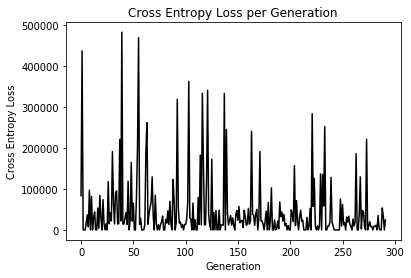

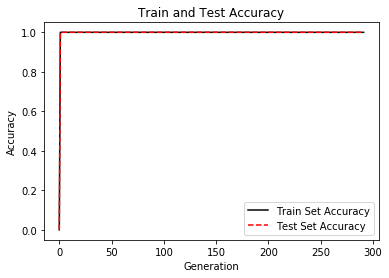

In [15]:
%matplotlib inline
# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Cross Entropy Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Cross Entropy Loss')
plt.show()

# Plot train and test accuracy
plt.plot(train_acc, 'k-', label='Train Set Accuracy')
plt.plot(test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()